In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [4]:
tensorflow.test.is_gpu_available()

True

In [5]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
labels = os.listdir("/kaggle/input/open-close")

In [7]:
labels

['Closed', 'Open']

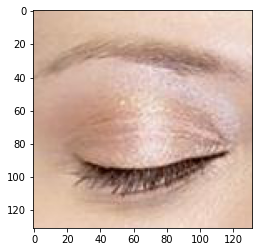

In [8]:
plt.imshow(plt.imread("/kaggle/input/open-close/Closed/_2.jpg"))

In [9]:
a = plt.imread("/kaggle/input/open-close/Open/_106.jpg")

In [10]:
a

array([[[239, 201, 188],
        [239, 201, 188],
        [239, 201, 188],
        ...,
        [227, 191, 179],
        [227, 191, 179],
        [227, 191, 179]],

       [[239, 201, 188],
        [239, 201, 188],
        [239, 201, 188],
        ...,
        [227, 191, 179],
        [227, 191, 179],
        [227, 191, 179]],

       [[238, 200, 187],
        [238, 200, 187],
        [238, 200, 187],
        ...,
        [228, 192, 180],
        [228, 192, 180],
        [228, 192, 180]],

       ...,

       [[227, 181, 166],
        [227, 181, 166],
        [228, 182, 167],
        ...,
        [246, 200, 185],
        [246, 200, 185],
        [246, 200, 185]],

       [[227, 181, 166],
        [227, 181, 166],
        [228, 182, 167],
        ...,
        [246, 200, 185],
        [246, 200, 185],
        [246, 200, 185]],

       [[227, 181, 166],
        [227, 181, 166],
        [228, 182, 167],
        ...,
        [246, 200, 185],
        [246, 200, 185],
        [246, 200, 185]]

In [11]:
a.shape

(300, 368, 3)

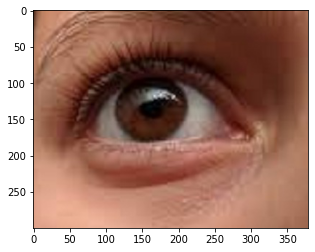

In [12]:
plt.imshow(plt.imread("/kaggle/input/open-close/Open/_100.jpg"))

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [14]:
train_data = train_data_gen.flow_from_directory("/kaggle/input/open-close/", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 1162 images belonging to 2 classes.


In [15]:
validation_data = train_data_gen.flow_from_directory("/kaggle/input/open-close/", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 290 images belonging to 2 classes.


In [16]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
test_data = test_data_gen.flow_from_directory("/kaggle/input/open-close/",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 1452 images belonging to 2 classes.


In [18]:
train_data

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [20]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [21]:
model.build(input_shape=(80, 80, 3))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [23]:
validation_steps = len(test_data)
validation_steps

182

In [24]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
146/146 [==============================] - 21s 95ms/step - loss: 0.5081 - accuracy: 0.7255 - val_loss: 0.2491 - val_accuracy: 0.9125
Epoch 2/55
146/146 [==============================] - 9s 63ms/step - loss: 0.2070 - accuracy: 0.9320 - val_loss: 0.1647 - val_accuracy: 0.9449
Epoch 3/55
146/146 [==============================] - 10s 66ms/step - loss: 0.1626 - accuracy: 0.9423 - val_loss: 0.1248 - val_accuracy: 0.9566
Epoch 4/55
146/146 [==============================] - 9s 63ms/step - loss: 0.1396 - accuracy: 0.9501 - val_loss: 0.1085 - val_accuracy: 0.9566
Epoch 5/55
146/146 [==============================] - 9s 63ms/step - loss: 0.1318 - accuracy: 0.9492 - val_loss: 0.1059 - val_accuracy: 0.9580
Epoch 6/55
146/146 [==============================] - 10s 66ms/step - loss: 0.0982 - accuracy: 0.9673 - val_loss: 0.0664 - val_accuracy: 0.9800
Epoch 7/55
146/146 [==============================] - 9s 62ms/step - loss: 0.0799 - accuracy: 0.9811 - val_loss: 0.1028 - val_accuracy: 0.9

In [25]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

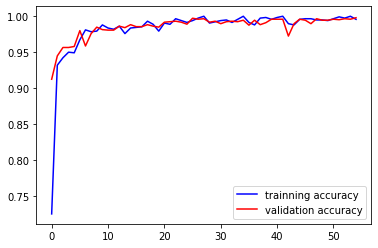

In [26]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

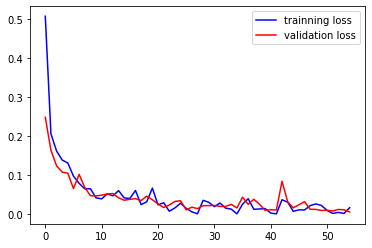

In [27]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [28]:
model.save("drowiness.h5")

In [29]:
model.save("drowiness.model")

# Drowsiness Main

In [30]:
#pip install pillow

In [31]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [32]:
model = load_model('drowiness.h5')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [46]:
prediction = model.predict(test_data)

In [48]:
labels_new = ["Closed", "Open"]
IMG_SIZE = 80
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [49]:
prediction = model.predict([prepare("/kaggle/input/open-close/Open/_10.jpg")])
np.argmax(prediction)

1

In [50]:
prediction = model.predict([prepare("/kaggle/input/open-close/Closed/_105.jpg")])
np.argmax(prediction)

0

In [51]:
prediction = model.predict([prepare("/kaggle/input/open-close/Closed/_107.jpg")])
np.argmax(prediction)

0